# Tema 2 IA - ML Aplicat
### Alexandru LICURICEANU - 332CD

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline 

CREDIT_RISK_TEST_PATH = './tema2_Credit_Risk/credit_risk_test.csv'
CREDIT_RISK_TRAIN_PATH = './tema2_Credit_Risk/credit_risk_train.csv'
CREDIT_RISK_FULL_PATH = './tema2_Credit_Risk/credit_risk_full.csv'

SALARY_PREDICTION_TEST_PATH = './tema2_SalaryPrediction/SalaryPrediction_test.csv'
SALARY_PREDICTION_TRAIN_PATH = './tema2_SalaryPrediction/SalaryPrediction_train.csv'
SALARY_PREDICTION_FULL_PATH = './tema2_SalaryPrediction/SalaryPrediction_full.csv'

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 1. Analiza tipului de atribute si a plajei de valori a acestora.

### 1.1. Dataset-ul "credit_risk_full".

Numarul de atribute numerice continue care nu au valori lipsa:

In [46]:
cr_df = pd.read_csv(CREDIT_RISK_FULL_PATH)
cr_df.count(numeric_only=True)

loan_rate                        9060
loan_amount                     10000
job_tenure_years                 9736
credit_history_length_years     10000
applicant_age                   10000
applicant_income                10000
loan_income_ratio               10000
credit_history_length_months    10000
dtype: int64

Valorea medie, deviatia standard a valorilor, valoarea minima, valoarea percentilelor 25%, 50%, 75%, valoarea maxima:

In [47]:
cr_df.describe()

,loan_rate,loan_amount,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_income_ratio,credit_history_length_months
count,9060.000,10000.000,9736.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,11.007,9568.038,4.786,5.811,27.745,65734.211,0.170,75.761
std,3.266,6350.432,4.353,4.050,6.360,56944.387,0.107,48.677
min,5.420,500.000,0.000,2.000,20.000,4200.000,0.000,25.000
25%,7.900,5000.000,2.000,3.000,23.000,38595.000,0.090,41.000
50%,10.990,8000.000,4.000,4.000,26.000,55000.000,0.150,57.000
75%,13.470,12200.000,7.000,8.000,30.000,78997.000,0.230,102.000
max,23.220,35000.000,123.000,30.000,123.000,2039784.000,0.760,369.000


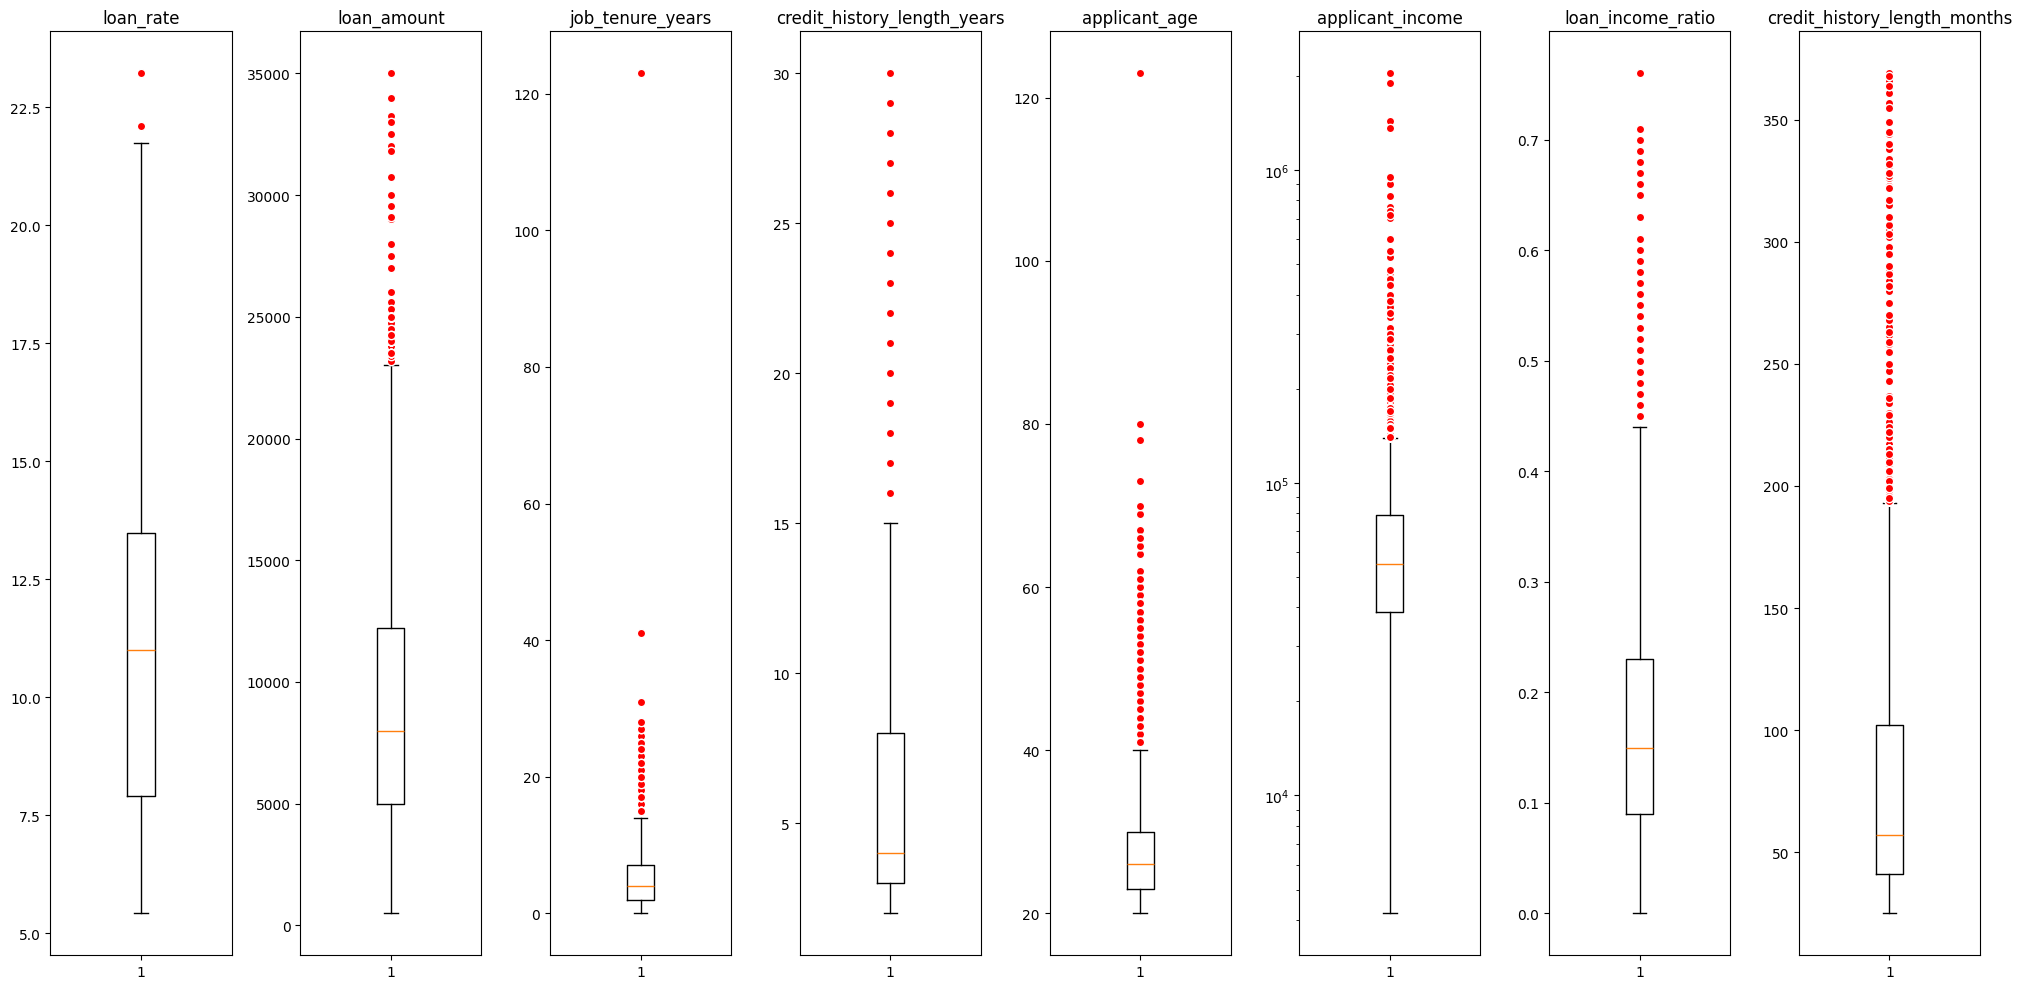

In [48]:
numeric_columns = cr_df.describe().columns

circle = dict(markerfacecolor='r', marker='o', markeredgecolor='w')
fig, axs = plt.subplots(1, len(numeric_columns), figsize=(20, 10))

for i, column in enumerate(numeric_columns):

    ax = axs[i]
    ax.boxplot(cr_df[column].dropna(), flierprops=circle)
    ax.set_title(column)

    if column == 'applicant_income':
        ax.semilogy()

plt.tight_layout()

Numarul de atribute discrete care nu au valori lipsa:

In [49]:
cr_df.select_dtypes(exclude=['number']).notnull().sum()


residential_status               10000
loan_purpose                     10000
loan_approval_status             10000
loan_rating                      10000
credit_history_default_status    10000
stability_rating                 10000
dtype: int64

Numarul de valori unice:

In [50]:
cr_df.select_dtypes(exclude=['number']).nunique()

residential_status               4
loan_purpose                     6
loan_approval_status             2
loan_rating                      7
credit_history_default_status    2
stability_rating                 4
dtype: int64

Distributia atributelor discrete:

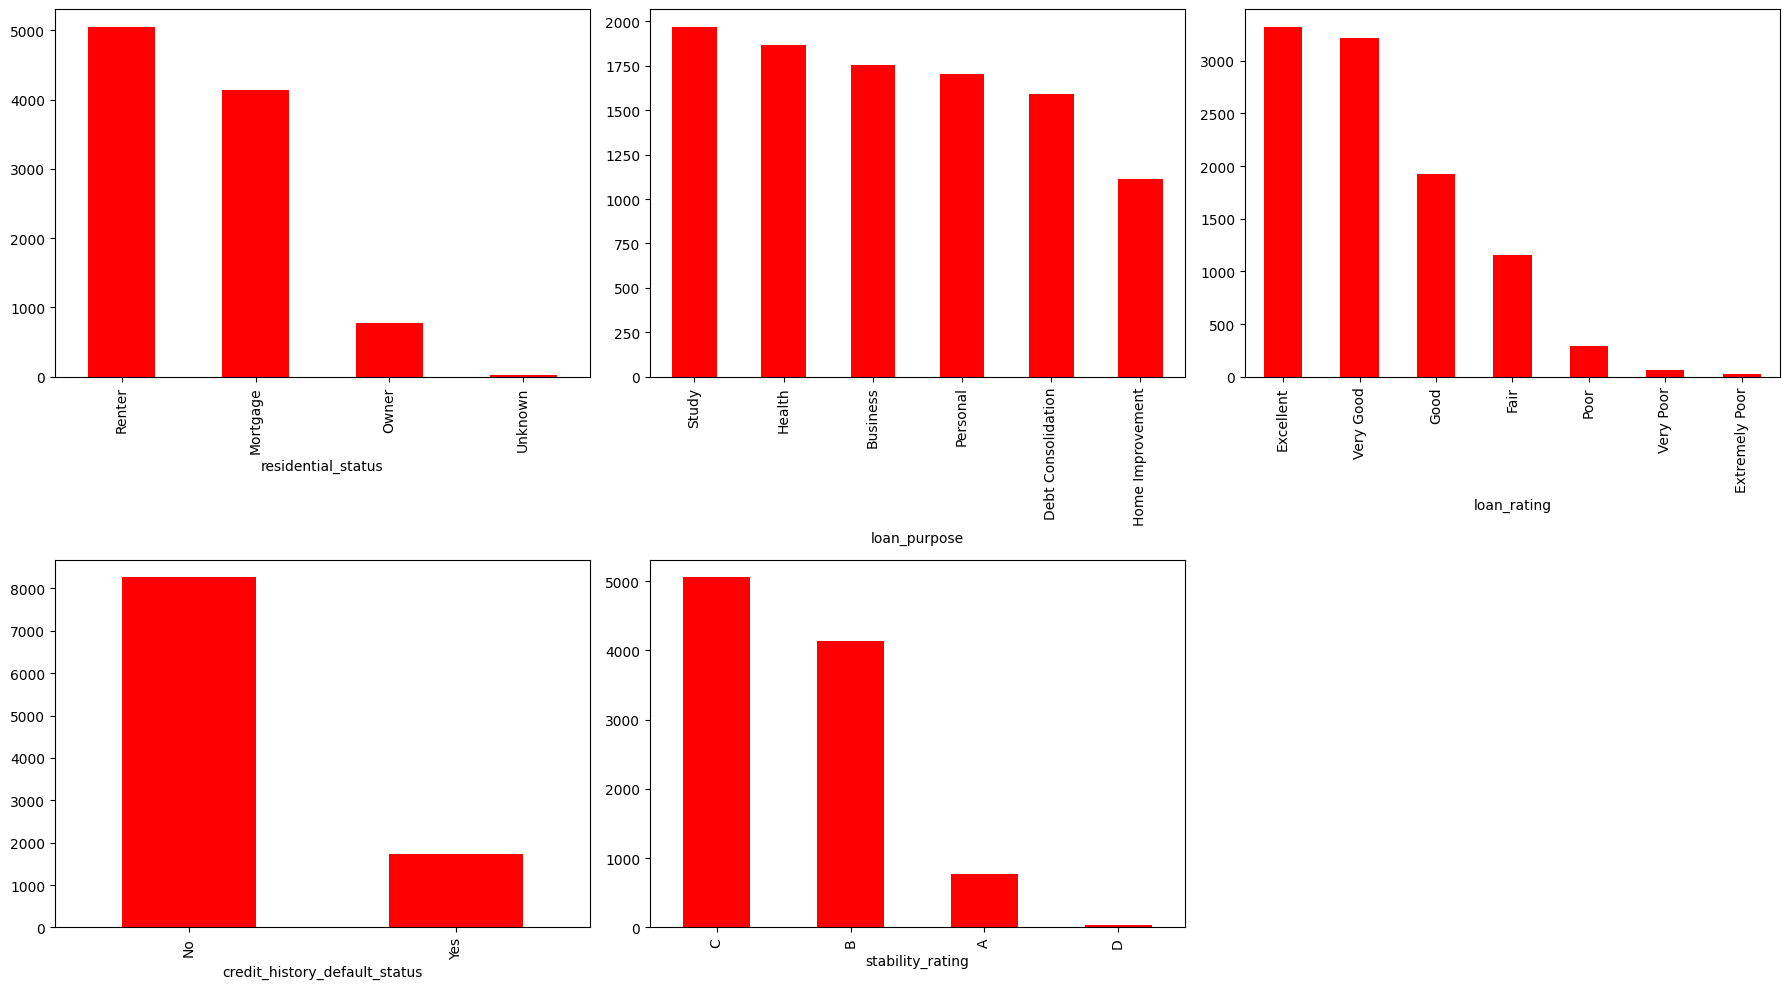

In [51]:
non_numeric_columns = cr_df.select_dtypes(exclude=['number']).notnull().columns
non_numeric_columns = non_numeric_columns[non_numeric_columns != 'loan_approval_status']

nr_rows = 2
nr_columns = (len(non_numeric_columns) + nr_rows - 1) // nr_rows

fig, axs = plt.subplots(nr_rows, nr_columns, figsize=(18, 10))
axs = axs.flatten()

for i, column in enumerate(non_numeric_columns):
    ax = axs[i]
    cr_df[column].value_counts().plot(kind='bar', ax=ax, color='r')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()

### 1.2. Dataset-ul "SalaryPrediction_full":

Numarul de atribute numerice continue care nu au valori lipsa:

In [52]:
sp_df = pd.read_csv(SALARY_PREDICTION_FULL_PATH, na_values=['?'])
sp_df.count(numeric_only=True)

fnl        9999
hpw        9199
gain       9999
edu_int    9999
years      9999
loss       9999
prod       9999
dtype: int64

Valorea medie, deviatia standard a valorilor, valoarea minima, valoarea percentilelor 25%, 50%, 75%, valoarea maxima:

In [53]:
sp_df.describe()

,fnl,hpw,gain,edu_int,years,loss,prod
count,9999.000,9199.000,9999.000,9999.000,9999.000,9999.000,9999.000
mean,190352.902,40.416,979.853,14.262,38.647,84.111,2014.928
std,106070.863,12.517,7003.795,24.771,13.745,394.035,14007.604
min,19214.000,1.000,0.000,1.000,17.000,0.000,-28.000
25%,118282.500,40.000,0.000,9.000,28.000,0.000,42.000
50%,178472.000,40.000,0.000,10.000,37.000,0.000,57.000
75%,237311.000,45.000,0.000,13.000,48.000,0.000,77.000
max,1455435.000,99.000,99999.000,206.000,90.000,3770.000,200125.000


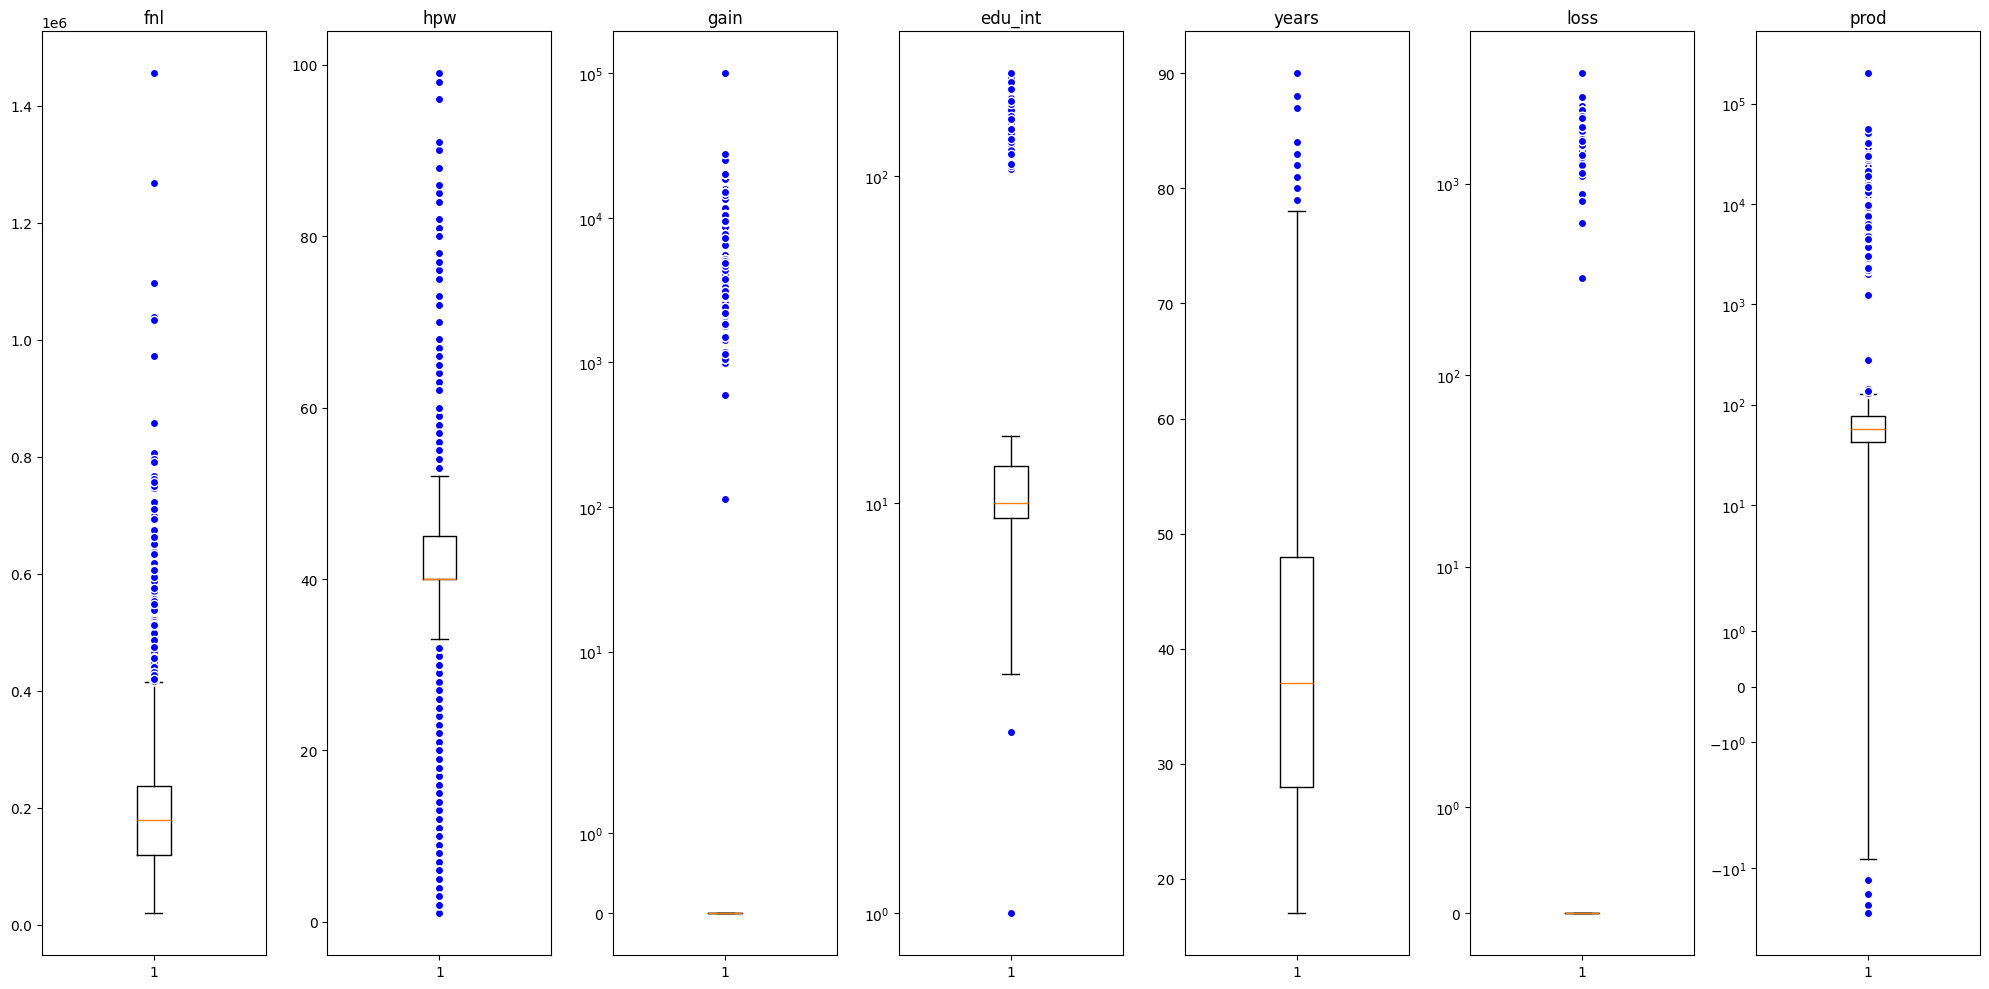

In [54]:
numeric_columns = sp_df.describe().columns

circle = dict(markerfacecolor='b', marker='o', markeredgecolor='w')
fig, axs = plt.subplots(1, len(numeric_columns), figsize=(20, 10))

for i, column in enumerate(numeric_columns):

    ax = axs[i]
    ax.boxplot(sp_df[column].dropna(), flierprops=circle)
    ax.set_title(column)

    if column == 'edu_int' or column == 'prod':
        ax.set_yscale('symlog')

    if column == 'gain' or column == 'loss':
        ax.set_yscale('symlog')

plt.tight_layout()

Numarul de atribute discrete care nu au valori lipsa:

In [55]:
sp_df.select_dtypes(exclude=['number']).notnull().sum()

relation     9999
country      9841
job          9417
work_type    9419
partner      9999
edu          9999
gender       9199
race         9999
gtype        9999
money        9999
dtype: int64

Numarul de valori unice:

In [56]:
sp_df.select_dtypes(exclude=['number']).nunique()

relation      6
country      40
job          13
work_type     8
partner       7
edu          16
gender        2
race          5
gtype         2
money         2
dtype: int64

Distributiile atributelor discrete:

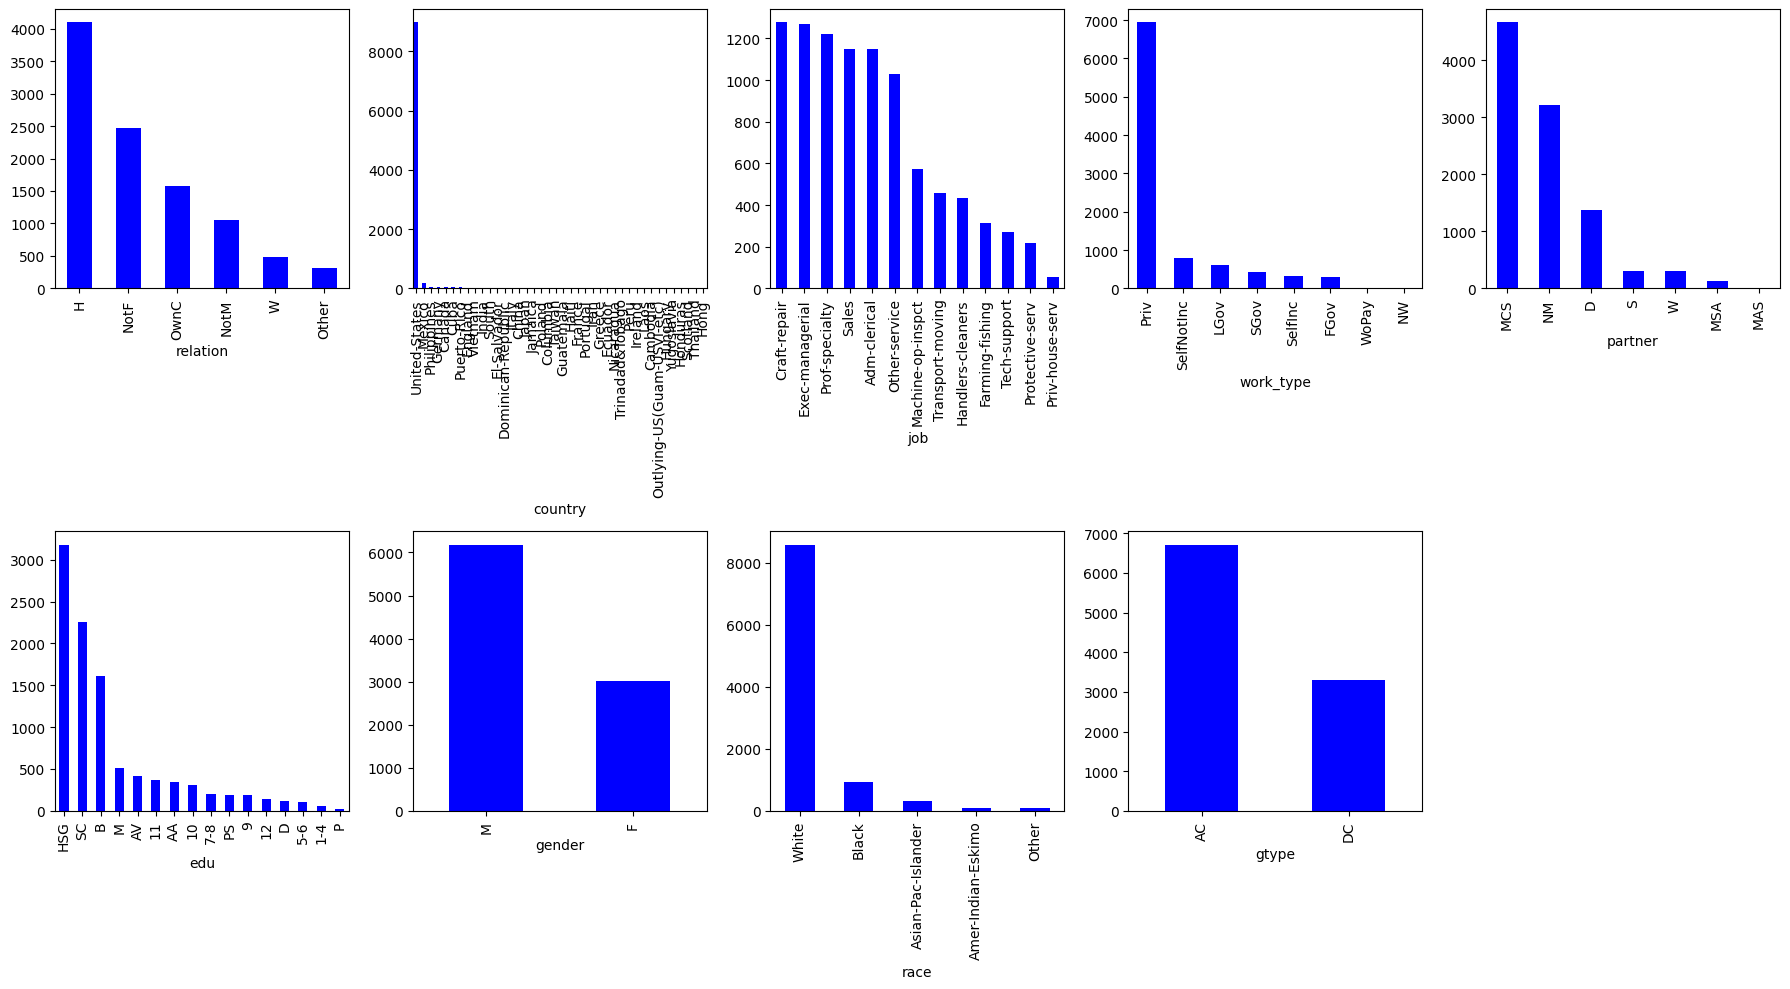

In [57]:
non_numeric_columns = sp_df.select_dtypes(exclude=['number']).notnull().columns
non_numeric_columns = non_numeric_columns[non_numeric_columns != 'money']

nr_rows = 2
nr_columns = (len(non_numeric_columns) + nr_rows - 1) // nr_rows

fig, axs = plt.subplots(nr_rows, nr_columns, figsize=(18, 10))
axs = axs.flatten()

for i, column in enumerate(non_numeric_columns):
    ax = axs[i]
    sp_df[column].value_counts().plot(kind='bar', ax=ax, color='b')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()


# 2. Analiza echilibrului de clase

### 2.1. Dataset-ul "credit_risk"

Pentru setul de date de antrenare:

<Axes: xlabel='loan_approval_status'>

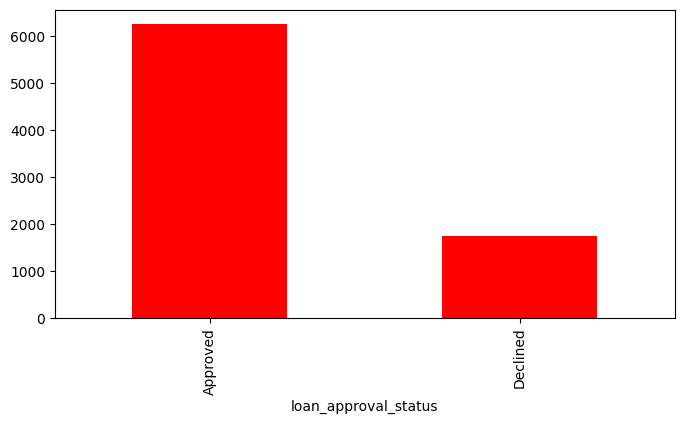

In [63]:
cr_train_df = pd.read_csv(CREDIT_RISK_TRAIN_PATH)
cr_train_df['loan_approval_status'].value_counts().plot(kind='bar', figsize=(8, 4), color='r')

Pentru setul de date de test:

<Axes: xlabel='loan_approval_status'>

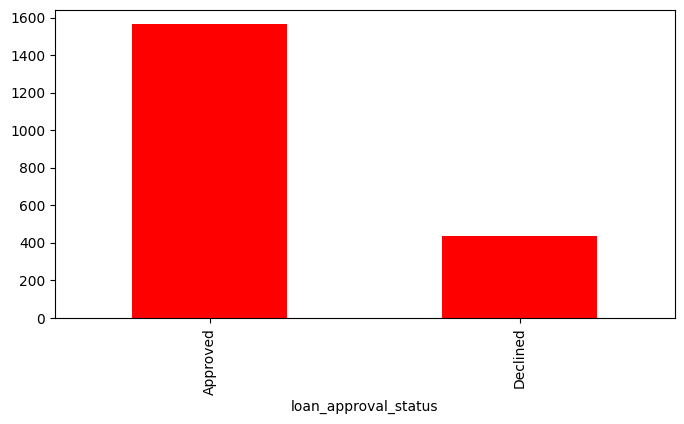

In [64]:
cr_test_df = pd.read_csv(CREDIT_RISK_TEST_PATH)
cr_test_df['loan_approval_status'].value_counts().plot(kind='bar', figsize=(8, 4), color='r')

### 2.1. Dataset-ul "SalaryPrediction"

Pentru setul de date de antrenare:

<Axes: xlabel='money'>

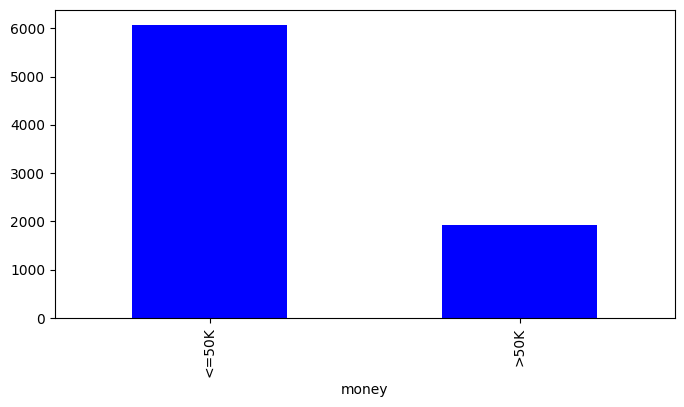

In [60]:
sp_train_df = pd.read_csv(SALARY_PREDICTION_TRAIN_PATH)
sp_train_df['money'].value_counts().plot(kind='bar', figsize=(8, 4), color='b')

Pentru setul de date de test:

<Axes: xlabel='money'>

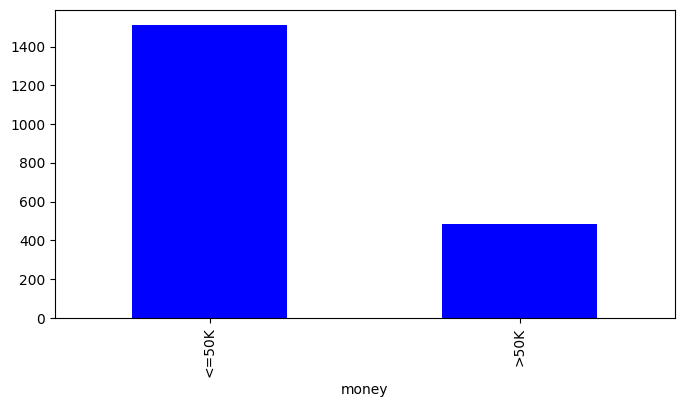

In [61]:
sp_test_df = pd.read_csv(SALARY_PREDICTION_TEST_PATH)
sp_test_df['money'].value_counts().plot(kind='bar', figsize=(8, 4), color='b')

# 3. Analiza corelatiei intre atribute